# IDC Breast Cancer Prediction with CNN

## Data

The original dataset is consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. From that, 277,524 patches of size 50 x 50 were extracted (198,738 IDC negative and 78,786 IDC positive). The dataset can be found [here](
https://www.kaggle.com/paultimothymooney/breast-histopathology-images)

The original files are located here: http://gleason.case.edu/webdata/jpi-dl-tutorial/IDC_regular_ps50_idx5.zip
Citation: https://www.ncbi.nlm.nih.gov/pubmed/27563488 and http://spie.org/Publications/Proceedings/Paper/10.1117/12.2043872

## Building a CNN for image classification in Keras

#### Data Loading, Image Preprocessing & Feature Scaling

In [2]:
# Importing necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import adam
from keras import models
from keras.preprocessing import image
import matplotlib.pyplot as plt
import math
import numpy as np
from keras.preprocessing import image
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os

In [13]:
# Check the size of the dataset images
img_path = 'datasets/test_set/0/'+ os.listdir('datasets/test_set/0')[0] #get the first image from the test set
img = image.load_img(img_path) 
print(f'The size of the input image is: {np.array(img).shape[0]} x {np.array(img).shape[1]}')

The size of the input image is: 50 x 50


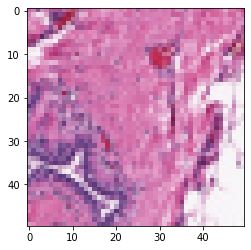

In [14]:
# Print the image
plt.imshow(img)
plt.show()

In [5]:
# Set the input size of the images 
input_size = (50, 50)

In [6]:
# Load the data-images and perform transformations
from keras.preprocessing.image import ImageDataGenerator

#With ImageGenerator attributes we can make batches of transformed images
train_datagen = ImageDataGenerator(rescale = 1./255, #feature scaling all picture values between [0,1] 255 is the maximun value of pixels
                                   #shear_range = 0.2,#Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees) def 0
                                   #zoom_range = 0.2, #Float or [lower, upper]. Range for random zoom. def 0
                                   rotation_range=20, #Int. Degree range for random rotations.
                                   vertical_flip = True, # Boolean. Randomly flip inputs vertically.
                                   horizontal_flip = True) # Boolean. Randomly flip inputs horizontally.

test_datagen = ImageDataGenerator(rescale = 1./255)

#If we do not want to apply any feature scaling or preprocessing
# train_datagen = ImageDataGenerator()
# test_datagen = ImageDataGenerator()

training_set = train_datagen.flow_from_directory('datasets/training_set',
                                                 target_size = input_size, # final size of images. the bigger the size the more time it takes to run 
                                                 batch_size = 10,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('datasets/test_set',
                                            target_size = input_size,
                                            batch_size = 10,
                                            class_mode = 'binary')

Found 10694 images belonging to 2 classes.
Found 2991 images belonging to 2 classes.


#### Designing & Building the CNN model

In [12]:
# Initialising the CNN
classifier = Sequential()

In [13]:
# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (*input_size, 3), activation = 'relu'))
#Conv2D 32 or 64 or 128 the number of filters (32 is a common number)
#(3,3) kernel-filter 3x3 dimension-size (Therefore, 3x3 is the optimal choice to be followed by practitioners until now)
# (*input_size, 3) because of RGB images if we had bw images we would have 2

In [14]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#pool_size = dimension of feature detector

In [15]:
# Adding convolutional layer
classifier.add(Conv2D(16, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [68]:
# # Adding convolutional layer
# classifier.add(Conv2D(16, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [69]:
# # Adding convolutional layer
# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [70]:
# Adding convolutional layer
# classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [71]:
# Adding convolutional layer
# classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [72]:
# Step 3 - Flattening & Dropout
classifier.add(Flatten())
classifier.add(Dropout(0.2))

In [73]:
# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))# units = number of hidden neurons
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [74]:
# Compiling the CNN
opt = adam(lr=0.001)#, decay=1e-6
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])#Alternative optimizers: adam, rmsprop

In [75]:
#The model will train for 10 epochs but we will use ModelCheckpoint to store the weights of the best performing epoch. 
#We will specify val_acc as the metric to use to define the best model. 
#This means we will keep the weights of the epoch that scores highest in terms of accuracy on the test set.
#This must be before training the model
# checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
#                                monitor = 'val_acc',
#                                verbose=1, 
#                                save_best_only=True)

#### Training the model

In [76]:
NUM_TRAIN_IMAGES = 66
NUM_TEST_IMAGES = 32
BS = 10 #batch size

In [77]:
# # Fit the classifier
# history = classifier.fit(x=training_set, 
#                          batch_size=1000, 
#                          epochs=15, 
#                          validation_data=test_set)

# Fit the classifier with fit_generator
history = classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set), # or NUM_TRAIN_IMAGES//BS or a single value: 8000
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = len(test_set))#or NUM_TEST_IMAGES//BS or a single value: 62,5

# We get the same results if we dont specify the steps_per_epoch but if we want to train on more than batch images like the hole dataset
# just use a custom number of steps_per_epoch
# history = classifier.fit_generator(training_set,
#                                    steps_per_epoch=5000,
#                                    epochs = 15,
#                                    validation_data = test_set)

Epoch 1/10
1070/1070 [==============================] - 82s 76ms/step - loss: 0.5368 - accuracy: 0.7308 - val_loss: 0.2444 - val_accuracy: 0.7640
Epoch 2/10
1070/1070 [==============================] - 75s 70ms/step - loss: 0.4538 - accuracy: 0.7953 - val_loss: 0.0386 - val_accuracy: 0.7967
Epoch 3/10
1070/1070 [==============================] - 81s 76ms/step - loss: 0.4287 - accuracy: 0.8125 - val_loss: 0.7694 - val_accuracy: 0.8305
Epoch 4/10
1070/1070 [==============================] - 80s 75ms/step - loss: 0.4228 - accuracy: 0.8152 - val_loss: 0.2957 - val_accuracy: 0.8298
Epoch 5/10
1070/1070 [==============================] - 76s 71ms/step - loss: 0.4211 - accuracy: 0.8186 - val_loss: 1.5624 - val_accuracy: 0.8024
Epoch 6/10
1070/1070 [==============================] - 73s 69ms/step - loss: 0.4085 - accuracy: 0.8220 - val_loss: 0.1632 - val_accuracy: 0.7940
Epoch 7/10
1070/1070 [==============================] - 78s 73ms/step - loss: 0.4092 - accuracy: 0.8227 - val_loss: 0.1205 -

#### Generating plots to Evaluate the Training Results

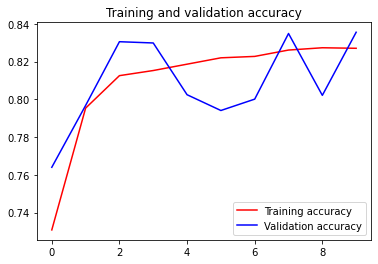

<Figure size 432x288 with 0 Axes>

In [78]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

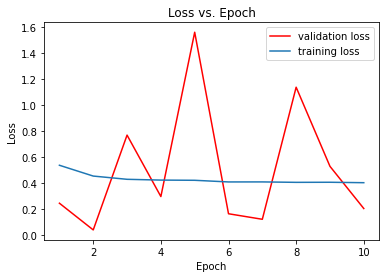

In [79]:
def plot_loss(history):
    train_loss=history.history['loss']
    val_loss=history.history['val_loss']
    x=list(range(1,len(val_loss)+1))
    plt.plot(x,val_loss,color='red',label='validation loss')
    plt.plot(x,train_loss,label='training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
#Loss vs Epoch
plot_loss(history)

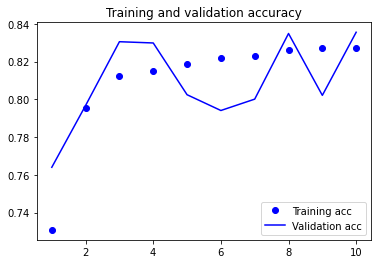

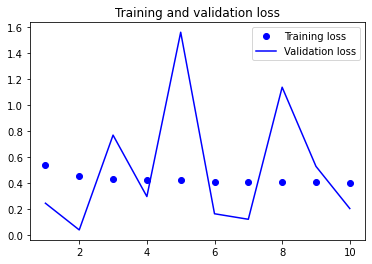

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Confusion Matrix 

The accuracy of the model in evaluating the test set is: 62.22 %


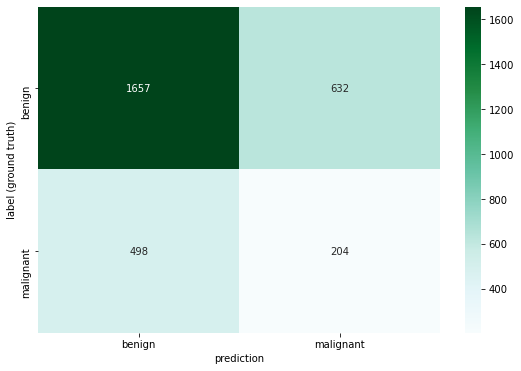

In [81]:
# Pass the test set through the CNN and evaluate the results (we could do this also with a validation set)
result = classifier.predict(test_set)
# Use the rounding function to convert probabilities to classes
test_predictions = np.round(result)
test_actual_values  = test_set.classes.reshape(-1,1)
number_of_correct_predictions = np.sum(test_predictions == test_actual_values)
total_number_of_predictions = len(test_predictions)

# Print the overall accuracy
print(f'The accuracy of the model in evaluating the test set is: {round(number_of_correct_predictions/total_number_of_predictions*100,2)} %')

# Print the confusion matrix 
arr = confusion_matrix(test_predictions, test_actual_values)
class_names = ['benign', 'malignant']
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

#### Single slide image prediction

In [82]:
# Part 3 - Making new predictions

test_image = image.load_img('datasets/single_prediction/8863_idx5_x1051_y1651_class1.png', target_size = input_size)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

#Check the indexes which corresponds to each class
training_set.class_indices

{'0': 0, '1': 1}

In [83]:
result[0][0]

0.0

In [84]:
#Assign the result to the right class
if round(result[0][0]) == 1:
    prediction = 'malignant'
else:
    prediction = 'benign'
    
print('Result:',prediction)

Result: benign


#### Model Explanation

In [19]:
# let’s save the final model for usage later:
classifier.save('shapes_cnn.h5')

In [59]:
#Model Summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

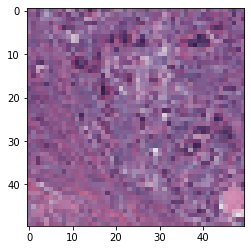

(1, 50, 50, 3)


In [45]:
#Predicting the class of unseen images
img_path = 'datasets/single_prediction/8863_idx5_x1051_y1651_class1.png'
img = image.load_img(img_path, target_size=input_size)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [46]:
# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [[1]]


In [47]:
#Instantiating a model from an input tensor and a list of output tensors
layer_outputs = [layer.output for layer in classifier.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
#When fed an image input, this model returns the values of the layer activations in the original model.

In [48]:
#Running the model in predict mode
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

In [49]:
#For instance, this is the activation of the first convolution layer for the image input:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 48, 48, 16)


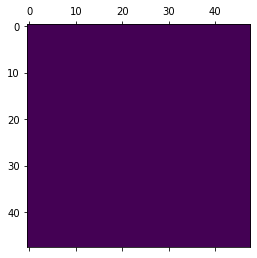

In [50]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [ ]:
#Visualizing every channel in every intermediate activation
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Building a CNN for image classification in Pytorch

#### Data Loading, Image Preprocessing & Feature Scaling

In [1]:
# Importing necessary libraries
import torch
import numpy as np
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline

In [3]:
# Data augmentation for train data + conversion to tensor 
train_transforms = transforms.Compose([
    transforms.Resize((50,50)),#resize image
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(12),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #if we had bw (0.5,),(0.5,)
    #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Data augmentation for test data + conversion to tensor
test_transforms= transforms.Compose([
    transforms.Resize((50,50)),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

#Load our dataset
train_data = datasets.ImageFolder(root = 'datasets/training_set',
                                     transform = train_transforms)

test_data = datasets.ImageFolder(root = 'datasets/test_set',
                                    transform = test_transforms)

In [4]:
# Grab the first data record
for i, (X_train, y_train) in enumerate(train_data):
    break
    
print(f'Image:{X_train.view(1,3,50,50)}, Label:{y_train}')

Image:tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.7961, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.8353, 0.0000, 0.0000],
          [0.7765, 0.7569, 0.8314,  ..., 0.8471, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.9804,  ..., 0.9843, 0.9804, 0.9804],
          [0.0000, 0.0000, 0.9765,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.9529,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.4902, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.4471, 0.0000, 0.0000],
          [0.6471, 0.6078, 0.6784,  ..., 0.5725, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.9647,  ..., 0.9765, 0.9686, 0.9608],
          [0.0000, 0.0000, 0.9569,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.9176,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.6902, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.6706, 0.0000, 0.0000],
          [0.7804, 0.7804, 0.8235,  

In [5]:
#Check the dataset
train_data.class_to_idx
#test_data.class_to_idx

{'0': 0, '1': 1}

In [6]:
#Create train and test sets
num_workers = 0
batch_size = 10 #32 old value

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False,num_workers=num_workers)

# #To create both valid_set & test_set we can take a number of images from the training set and use them as validation set

# #Valid size parameter can be set below
# valid_size = 0.2

# # Finding indices for validation set
# num_train = len(train_data) #length of training dataset
# indices = list(range(num_train)) #indices = 0-length of training dataset-1

# #Randomize indices
# np.random.shuffle(indices) #shuffle indices
# split = int(np.floor(num_train*valid_size))
# train_index, test_index = indices[split:], indices[:split]

# # Making samplers for training and validation batches
# train_sampler = SubsetRandomSampler(train_index)
# valid_sampler = SubsetRandomSampler(test_index)

# # Creating data loaders
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
# valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)

In [7]:
#Print image and labels for the first batch (it will has the size of the batch)
for b, (X_train, y_train) in enumerate(train_loader):
    break
    
print(f'Image:{X_train}, Label:{y_train}')

Image:tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  

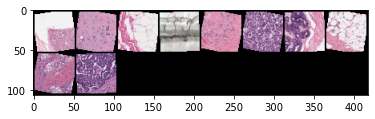

benign malignant benign benign malignant malignant benign benign malignant malignant


In [8]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('benign', 'malignant')

# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

#### Designing & Building the CNN model

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # convolutional layers
        self.conv1 = nn.Conv2d(3 , 16, kernel_size=3, padding=0)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=0)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=0)
        #self.conv4 = nn.Conv2d(32, 64, kernel_size=3, padding=0)
        #self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=0)
        #The Conv2d method lets you define, in this order: number of input channels (1 if images are grayscale, 3 if RGB), 
        #number of output channels (Number of filters, One filter produces one output channel), the size of the convolutional filter (you can supply a tuple for different shapes), 
        #stride and padding.
        
        # linear layers
        self.fc1 = nn.Linear(32 *4 *4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        #With Linear function we make fully connected layers
        #The first parameter of the first layer is the number of neurons of the last Conv2d 4*4 height and width of each of the 128 (in_channels of the first linear layer)*see below for more explanation
        #The second parameter of the final Linear layer must be equal to the number of output nodes (if we have binary classification then 1 else the number of classes)
        #The first parameter of each other layer (in_channels) is the second parameter of the previous layer (out_channels) (to connect the right amount of nodes)
        
        # dropout
        self.dropout = nn.Dropout(p=0.2) #try also with 0.2
        
        # max pooling
        self.pool = nn.MaxPool2d(2, 2)
    
    def forward(self, x):
        
        # convolutional layers with ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        #x = self.pool(F.relu(self.conv4(x)))
        #x = self.pool(F.relu(self.conv5(x)))
        
        # flattening the image
        x = x.view(-1, 32 *4 *4)
        
        # linear layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.fc4(x)
        return torch.sigmoid(x) # We use sigmoid because we have only two classes 0 or 1
        
model = Net()

In [10]:
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [11]:
# loss function (cross entropy loss)
criterion = nn.BCELoss() #because we have a binary classification problem else nn.CrossEntropyLoss()

# optimizer
learning_rate=0.001 #Adams default = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#or to use another optimizer 
#import torch.optim as optim
#optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [12]:
# Check outputs before training 
for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        break

outputs

tensor([[0.4981],
        [0.4929],
        [0.4946],
        [0.4960],
        [0.4964],
        [0.4969],
        [0.4939],
        [0.4973],
        [0.4939],
        [0.4981]], grad_fn=<SigmoidBackward>)

In [13]:
# Check labels before training 
for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        break

labels

tensor([0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
# Interpreting results for binary image classification
epochs = 1
for epoch in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches. Batches are set in train/test loader 
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train.float())

    break

predicted = torch.round(y_pred.data.view(1,-1)) # with view(1,-1) we convert the vertical tensor into horizontal and -1 does not specify length. Instead of using view we could possibly use a custom rounding function
print(predicted)
print(y_train)
print((predicted == y_train).sum())

#### Training the model

In [14]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for epoch in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches. Batches are set in train/test loader 
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train.float())
        
        # Tally the number of correct predictions
        # For binary classification
        predicted = torch.round(y_pred.data.view(1,-1)) # with view(1,-1) we convert the vertical tensor into horizontal and -1 does not specify length. Instead of using view we could possibly use a custom rounding function
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
            
#         # For multiclass classification    
#         predicted = torch.max(y_pred.data, 1)[1] #torch.max(y_pred.data, 1) get the predictions for each row and the index of the max position 
#         batch_corr = (predicted == y_train).sum() # True 1 / False 0
#         trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        print(f'epoch: {epoch+1:3}  batch: {b:4} [{b*batch_size:6}/{len(train_data):6}]  loss: {loss.item():10.8f}  accuracy: {trn_corr.item()*100/(b*batch_size):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            # For binary classification
            predicted = torch.round(y_val.data.view(1,-1)) # with view(1,-1) we convert the vertical tensor into horizontal and -1 does not specify length. Instead of using view we could possibly use a custom rounding function
            tst_corr += (predicted == y_test).sum()
            
#            # For multiclass classification  
#             predicted = torch.max(y_val.data, 1)[1] 
#             tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test.float())
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

C:\Users\xr123ng\AppData\Local\Continuum\anaconda3\envs\DeepLearningEnv\lib\site-packages\torch\nn\modules\loss.py:516: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch:   1  batch:    1 [    10/ 10694]  loss: 0.68774140  accuracy:  70.000%
epoch:   1  batch:    2 [    20/ 10694]  loss: 0.67353725  accuracy:  75.000%
epoch:   1  batch:    3 [    30/ 10694]  loss: 0.69208419  accuracy:  66.667%
epoch:   1  batch:    4 [    40/ 10694]  loss: 0.67154461  accuracy:  65.000%
epoch:   1  batch:    5 [    50/ 10694]  loss: 0.53960252  accuracy:  72.000%
epoch:   1  batch:    6 [    60/ 10694]  loss: 0.70120019  accuracy:  68.333%
epoch:   1  batch:    7 [    70/ 10694]  loss: 0.53793371  accuracy:  70.000%
epoch:   1  batch:    8 [    80/ 10694]  loss: 0.85197747  accuracy:  66.250%
epoch:   1  batch:    9 [    90/ 10694]  loss: 0.61162007  accuracy:  66.667%
epoch:   1  batch:   10 [   100/ 10694]  loss: 0.62293494  accuracy:  67.000%
epoch:   1  batch:   11 [   110/ 10694]  loss: 0.74595165  accuracy:  66.364%
epoch:   1  batch:   12 [   120/ 10694]  loss: 0.52795970  accuracy:  67.500%
epoch:   1  batch:   13 [   130/ 10694]  loss: 0.56338620  accur

epoch:   1  batch:  107 [  1070/ 10694]  loss: 0.41768312  accuracy:  72.056%
epoch:   1  batch:  108 [  1080/ 10694]  loss: 0.68469524  accuracy:  71.852%
epoch:   1  batch:  109 [  1090/ 10694]  loss: 0.50664759  accuracy:  71.927%
epoch:   1  batch:  110 [  1100/ 10694]  loss: 0.52403033  accuracy:  72.000%
epoch:   1  batch:  111 [  1110/ 10694]  loss: 0.52624005  accuracy:  71.982%
epoch:   1  batch:  112 [  1120/ 10694]  loss: 0.88657129  accuracy:  71.786%
epoch:   1  batch:  113 [  1130/ 10694]  loss: 0.55746537  accuracy:  71.770%
epoch:   1  batch:  114 [  1140/ 10694]  loss: 0.50070304  accuracy:  71.754%
epoch:   1  batch:  115 [  1150/ 10694]  loss: 0.53639776  accuracy:  71.739%
epoch:   1  batch:  116 [  1160/ 10694]  loss: 0.47912297  accuracy:  71.810%
epoch:   1  batch:  117 [  1170/ 10694]  loss: 0.76078284  accuracy:  71.624%
epoch:   1  batch:  118 [  1180/ 10694]  loss: 0.59229493  accuracy:  71.610%
epoch:   1  batch:  119 [  1190/ 10694]  loss: 0.61299503  accur

epoch:   1  batch:  213 [  2130/ 10694]  loss: 0.57621044  accuracy:  72.394%
epoch:   1  batch:  214 [  2140/ 10694]  loss: 0.13776663  accuracy:  72.523%
epoch:   1  batch:  215 [  2150/ 10694]  loss: 0.46400848  accuracy:  72.558%
epoch:   1  batch:  216 [  2160/ 10694]  loss: 0.29321343  accuracy:  72.639%
epoch:   1  batch:  217 [  2170/ 10694]  loss: 0.18699369  accuracy:  72.719%
epoch:   1  batch:  218 [  2180/ 10694]  loss: 0.69864219  accuracy:  72.706%
epoch:   1  batch:  219 [  2190/ 10694]  loss: 0.40349683  accuracy:  72.785%
epoch:   1  batch:  220 [  2200/ 10694]  loss: 0.50987303  accuracy:  72.818%
epoch:   1  batch:  221 [  2210/ 10694]  loss: 0.52334726  accuracy:  72.896%
epoch:   1  batch:  222 [  2220/ 10694]  loss: 0.50459945  accuracy:  72.883%
epoch:   1  batch:  223 [  2230/ 10694]  loss: 0.55621159  accuracy:  72.915%
epoch:   1  batch:  224 [  2240/ 10694]  loss: 0.36046603  accuracy:  72.991%
epoch:   1  batch:  225 [  2250/ 10694]  loss: 0.34145039  accur

epoch:   1  batch:  319 [  3190/ 10694]  loss: 0.30727854  accuracy:  74.828%
epoch:   1  batch:  320 [  3200/ 10694]  loss: 0.64247078  accuracy:  74.781%
epoch:   1  batch:  321 [  3210/ 10694]  loss: 0.52732623  accuracy:  74.798%
epoch:   1  batch:  322 [  3220/ 10694]  loss: 0.60959411  accuracy:  74.783%
epoch:   1  batch:  323 [  3230/ 10694]  loss: 0.64512616  accuracy:  74.768%
epoch:   1  batch:  324 [  3240/ 10694]  loss: 0.68856865  accuracy:  74.722%
epoch:   1  batch:  325 [  3250/ 10694]  loss: 0.67415112  accuracy:  74.708%
epoch:   1  batch:  326 [  3260/ 10694]  loss: 0.51869583  accuracy:  74.693%
epoch:   1  batch:  327 [  3270/ 10694]  loss: 0.26227668  accuracy:  74.771%
epoch:   1  batch:  328 [  3280/ 10694]  loss: 0.52150565  accuracy:  74.787%
epoch:   1  batch:  329 [  3290/ 10694]  loss: 0.59517515  accuracy:  74.772%
epoch:   1  batch:  330 [  3300/ 10694]  loss: 0.34642330  accuracy:  74.788%
epoch:   1  batch:  331 [  3310/ 10694]  loss: 0.47595540  accur

epoch:   1  batch:  530 [  5300/ 10694]  loss: 0.54358441  accuracy:  75.962%
epoch:   1  batch:  531 [  5310/ 10694]  loss: 0.39024326  accuracy:  75.970%
epoch:   1  batch:  532 [  5320/ 10694]  loss: 0.63017499  accuracy:  75.959%
epoch:   1  batch:  533 [  5330/ 10694]  loss: 0.77407533  accuracy:  75.929%
epoch:   1  batch:  534 [  5340/ 10694]  loss: 0.28021115  accuracy:  75.955%
epoch:   1  batch:  535 [  5350/ 10694]  loss: 0.52813178  accuracy:  75.944%
epoch:   1  batch:  536 [  5360/ 10694]  loss: 0.61826766  accuracy:  75.896%
epoch:   1  batch:  537 [  5370/ 10694]  loss: 0.73051673  accuracy:  75.866%
epoch:   1  batch:  538 [  5380/ 10694]  loss: 0.81672275  accuracy:  75.836%
epoch:   1  batch:  539 [  5390/ 10694]  loss: 0.51798606  accuracy:  75.826%
epoch:   1  batch:  540 [  5400/ 10694]  loss: 0.40480113  accuracy:  75.833%
epoch:   1  batch:  541 [  5410/ 10694]  loss: 0.50441092  accuracy:  75.841%
epoch:   1  batch:  542 [  5420/ 10694]  loss: 0.42898756  accur

epoch:   1  batch:  742 [  7420/ 10694]  loss: 0.51064593  accuracy:  76.509%
epoch:   1  batch:  743 [  7430/ 10694]  loss: 0.54570472  accuracy:  76.528%
epoch:   1  batch:  744 [  7440/ 10694]  loss: 0.48926154  accuracy:  76.546%
epoch:   1  batch:  745 [  7450/ 10694]  loss: 0.53310913  accuracy:  76.550%
epoch:   1  batch:  746 [  7460/ 10694]  loss: 0.37173706  accuracy:  76.582%
epoch:   1  batch:  747 [  7470/ 10694]  loss: 0.55822933  accuracy:  76.586%
epoch:   1  batch:  748 [  7480/ 10694]  loss: 0.49670640  accuracy:  76.578%
epoch:   1  batch:  749 [  7490/ 10694]  loss: 0.39222378  accuracy:  76.582%
epoch:   1  batch:  750 [  7500/ 10694]  loss: 0.51618642  accuracy:  76.587%
epoch:   1  batch:  751 [  7510/ 10694]  loss: 0.50820482  accuracy:  76.591%
epoch:   1  batch:  752 [  7520/ 10694]  loss: 0.48540798  accuracy:  76.596%
epoch:   1  batch:  753 [  7530/ 10694]  loss: 0.17237204  accuracy:  76.614%
epoch:   1  batch:  754 [  7540/ 10694]  loss: 0.61968386  accur

epoch:   1  batch:  849 [  8490/ 10694]  loss: 0.53237277  accuracy:  77.067%
epoch:   1  batch:  850 [  8500/ 10694]  loss: 0.41041207  accuracy:  77.071%
epoch:   1  batch:  851 [  8510/ 10694]  loss: 0.32576817  accuracy:  77.086%
epoch:   1  batch:  852 [  8520/ 10694]  loss: 0.26426283  accuracy:  77.101%
epoch:   1  batch:  853 [  8530/ 10694]  loss: 0.20138946  accuracy:  77.116%
epoch:   1  batch:  854 [  8540/ 10694]  loss: 0.50537801  accuracy:  77.119%
epoch:   1  batch:  855 [  8550/ 10694]  loss: 0.07031401  accuracy:  77.146%
epoch:   1  batch:  856 [  8560/ 10694]  loss: 0.29293463  accuracy:  77.150%
epoch:   1  batch:  857 [  8570/ 10694]  loss: 0.73023725  accuracy:  77.153%
epoch:   1  batch:  858 [  8580/ 10694]  loss: 0.64203918  accuracy:  77.145%
epoch:   1  batch:  859 [  8590/ 10694]  loss: 0.22558251  accuracy:  77.159%
epoch:   1  batch:  860 [  8600/ 10694]  loss: 0.34319538  accuracy:  77.163%
epoch:   1  batch:  861 [  8610/ 10694]  loss: 0.29999429  accur

epoch:   1  batch:  955 [  9550/ 10694]  loss: 0.28525808  accuracy:  77.277%
epoch:   1  batch:  956 [  9560/ 10694]  loss: 0.51229382  accuracy:  77.280%
epoch:   1  batch:  957 [  9570/ 10694]  loss: 0.49785137  accuracy:  77.273%
epoch:   1  batch:  958 [  9580/ 10694]  loss: 0.36168402  accuracy:  77.276%
epoch:   1  batch:  959 [  9590/ 10694]  loss: 0.16050997  accuracy:  77.289%
epoch:   1  batch:  960 [  9600/ 10694]  loss: 0.49939275  accuracy:  77.292%
epoch:   1  batch:  961 [  9610/ 10694]  loss: 0.26922789  accuracy:  77.294%
epoch:   1  batch:  962 [  9620/ 10694]  loss: 0.96547872  accuracy:  77.277%
epoch:   1  batch:  963 [  9630/ 10694]  loss: 0.35436076  accuracy:  77.269%
epoch:   1  batch:  964 [  9640/ 10694]  loss: 0.48039776  accuracy:  77.282%
epoch:   1  batch:  965 [  9650/ 10694]  loss: 0.29737869  accuracy:  77.295%
epoch:   1  batch:  966 [  9660/ 10694]  loss: 0.32403070  accuracy:  77.308%
epoch:   1  batch:  967 [  9670/ 10694]  loss: 0.34099868  accur

epoch:   1  batch: 1062 [ 10620/ 10694]  loss: 0.56840563  accuracy:  77.721%
epoch:   1  batch: 1063 [ 10630/ 10694]  loss: 0.34045202  accuracy:  77.723%
epoch:   1  batch: 1064 [ 10640/ 10694]  loss: 0.34636292  accuracy:  77.735%
epoch:   1  batch: 1065 [ 10650/ 10694]  loss: 1.01024413  accuracy:  77.718%
epoch:   1  batch: 1066 [ 10660/ 10694]  loss: 0.37198028  accuracy:  77.730%
epoch:   1  batch: 1067 [ 10670/ 10694]  loss: 0.33208632  accuracy:  77.741%
epoch:   1  batch: 1068 [ 10680/ 10694]  loss: 0.92277735  accuracy:  77.743%
epoch:   1  batch: 1069 [ 10690/ 10694]  loss: 0.36960629  accuracy:  77.746%
epoch:   1  batch: 1070 [ 10700/ 10694]  loss: 0.06476387  accuracy:  77.710%


C:\Users\xr123ng\AppData\Local\Continuum\anaconda3\envs\DeepLearningEnv\lib\site-packages\torch\nn\modules\loss.py:516: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
C:\Users\xr123ng\AppData\Local\Continuum\anaconda3\envs\DeepLearningEnv\lib\site-packages\torch\nn\modules\loss.py:516: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch:   2  batch:    1 [    10/ 10694]  loss: 0.56984925  accuracy:  70.000%
epoch:   2  batch:    2 [    20/ 10694]  loss: 0.86553717  accuracy:  65.000%
epoch:   2  batch:    3 [    30/ 10694]  loss: 0.33408049  accuracy:  73.333%
epoch:   2  batch:    4 [    40/ 10694]  loss: 0.34568661  accuracy:  75.000%
epoch:   2  batch:    5 [    50/ 10694]  loss: 0.33670530  accuracy:  76.000%
epoch:   2  batch:    6 [    60/ 10694]  loss: 0.38310173  accuracy:  76.667%
epoch:   2  batch:    7 [    70/ 10694]  loss: 0.50853574  accuracy:  78.571%
epoch:   2  batch:    8 [    80/ 10694]  loss: 0.52301550  accuracy:  78.750%
epoch:   2  batch:    9 [    90/ 10694]  loss: 0.42697930  accuracy:  80.000%
epoch:   2  batch:   10 [   100/ 10694]  loss: 0.43723899  accuracy:  81.000%
epoch:   2  batch:   11 [   110/ 10694]  loss: 0.39337015  accuracy:  81.818%
epoch:   2  batch:   12 [   120/ 10694]  loss: 0.42445531  accuracy:  82.500%
epoch:   2  batch:   13 [   130/ 10694]  loss: 0.39319584  accur

epoch:   2  batch:  108 [  1080/ 10694]  loss: 0.55284202  accuracy:  78.611%
epoch:   2  batch:  109 [  1090/ 10694]  loss: 0.27764934  accuracy:  78.807%
epoch:   2  batch:  110 [  1100/ 10694]  loss: 0.26379132  accuracy:  78.909%
epoch:   2  batch:  111 [  1110/ 10694]  loss: 0.50657618  accuracy:  78.919%
epoch:   2  batch:  112 [  1120/ 10694]  loss: 0.43660420  accuracy:  79.018%
epoch:   2  batch:  113 [  1130/ 10694]  loss: 0.53286034  accuracy:  78.938%
epoch:   2  batch:  114 [  1140/ 10694]  loss: 0.05580632  accuracy:  79.123%
epoch:   2  batch:  115 [  1150/ 10694]  loss: 0.37896696  accuracy:  79.217%
epoch:   2  batch:  116 [  1160/ 10694]  loss: 0.86258203  accuracy:  79.052%
epoch:   2  batch:  117 [  1170/ 10694]  loss: 0.25877637  accuracy:  79.145%
epoch:   2  batch:  118 [  1180/ 10694]  loss: 0.52242494  accuracy:  79.237%
epoch:   2  batch:  119 [  1190/ 10694]  loss: 0.45149541  accuracy:  79.244%
epoch:   2  batch:  120 [  1200/ 10694]  loss: 0.63485831  accur

epoch:   2  batch:  214 [  2140/ 10694]  loss: 0.49857193  accuracy:  80.374%
epoch:   2  batch:  215 [  2150/ 10694]  loss: 0.23670647  accuracy:  80.419%
epoch:   2  batch:  216 [  2160/ 10694]  loss: 0.39912996  accuracy:  80.417%
epoch:   2  batch:  217 [  2170/ 10694]  loss: 0.47188419  accuracy:  80.461%
epoch:   2  batch:  218 [  2180/ 10694]  loss: 0.52967083  accuracy:  80.459%
epoch:   2  batch:  219 [  2190/ 10694]  loss: 0.39908043  accuracy:  80.502%
epoch:   2  batch:  220 [  2200/ 10694]  loss: 0.37496400  accuracy:  80.545%
epoch:   2  batch:  221 [  2210/ 10694]  loss: 0.43656746  accuracy:  80.543%
epoch:   2  batch:  222 [  2220/ 10694]  loss: 0.32411212  accuracy:  80.586%
epoch:   2  batch:  223 [  2230/ 10694]  loss: 0.19386698  accuracy:  80.628%
epoch:   2  batch:  224 [  2240/ 10694]  loss: 0.79706627  accuracy:  80.536%
epoch:   2  batch:  225 [  2250/ 10694]  loss: 0.48821288  accuracy:  80.533%
epoch:   2  batch:  226 [  2260/ 10694]  loss: 0.91306943  accur

epoch:   2  batch:  320 [  3200/ 10694]  loss: 0.59154606  accuracy:  81.219%
epoch:   2  batch:  321 [  3210/ 10694]  loss: 0.46671039  accuracy:  81.215%
epoch:   2  batch:  322 [  3220/ 10694]  loss: 0.70982039  accuracy:  81.149%
epoch:   2  batch:  323 [  3230/ 10694]  loss: 0.39732504  accuracy:  81.146%
epoch:   2  batch:  324 [  3240/ 10694]  loss: 0.35831445  accuracy:  81.173%
epoch:   2  batch:  325 [  3250/ 10694]  loss: 0.67771935  accuracy:  81.138%
epoch:   2  batch:  326 [  3260/ 10694]  loss: 0.97058058  accuracy:  81.104%
epoch:   2  batch:  327 [  3270/ 10694]  loss: 0.26514053  accuracy:  81.131%
epoch:   2  batch:  328 [  3280/ 10694]  loss: 0.37735707  accuracy:  81.159%
epoch:   2  batch:  329 [  3290/ 10694]  loss: 0.26711193  accuracy:  81.185%
epoch:   2  batch:  330 [  3300/ 10694]  loss: 0.52505118  accuracy:  81.182%
epoch:   2  batch:  331 [  3310/ 10694]  loss: 0.39808068  accuracy:  81.148%
epoch:   2  batch:  332 [  3320/ 10694]  loss: 0.69933563  accur

epoch:   2  batch:  531 [  5310/ 10694]  loss: 0.38061726  accuracy:  81.017%
epoch:   2  batch:  532 [  5320/ 10694]  loss: 0.61521077  accuracy:  81.015%
epoch:   2  batch:  533 [  5330/ 10694]  loss: 0.22310433  accuracy:  81.051%
epoch:   2  batch:  534 [  5340/ 10694]  loss: 0.33288279  accuracy:  81.067%
epoch:   2  batch:  535 [  5350/ 10694]  loss: 0.45229435  accuracy:  81.065%
epoch:   2  batch:  536 [  5360/ 10694]  loss: 0.69153136  accuracy:  81.026%
epoch:   2  batch:  537 [  5370/ 10694]  loss: 0.26020387  accuracy:  81.043%
epoch:   2  batch:  538 [  5380/ 10694]  loss: 0.93851101  accuracy:  81.022%
epoch:   2  batch:  539 [  5390/ 10694]  loss: 0.25460228  accuracy:  81.039%
epoch:   2  batch:  540 [  5400/ 10694]  loss: 0.49447498  accuracy:  81.019%
epoch:   2  batch:  541 [  5410/ 10694]  loss: 0.39888531  accuracy:  81.017%
epoch:   2  batch:  542 [  5420/ 10694]  loss: 0.55905837  accuracy:  81.015%
epoch:   2  batch:  543 [  5430/ 10694]  loss: 0.56941587  accur

epoch:   2  batch:  637 [  6370/ 10694]  loss: 0.42720708  accuracy:  80.801%
epoch:   2  batch:  638 [  6380/ 10694]  loss: 0.47958690  accuracy:  80.815%
epoch:   2  batch:  639 [  6390/ 10694]  loss: 0.37530389  accuracy:  80.814%
epoch:   2  batch:  640 [  6400/ 10694]  loss: 0.40697575  accuracy:  80.828%
epoch:   2  batch:  641 [  6410/ 10694]  loss: 0.25581521  accuracy:  80.842%
epoch:   2  batch:  642 [  6420/ 10694]  loss: 0.44719329  accuracy:  80.841%
epoch:   2  batch:  643 [  6430/ 10694]  loss: 0.58699465  accuracy:  80.824%
epoch:   2  batch:  644 [  6440/ 10694]  loss: 0.63371909  accuracy:  80.792%
epoch:   2  batch:  645 [  6450/ 10694]  loss: 0.42853498  accuracy:  80.791%
epoch:   2  batch:  646 [  6460/ 10694]  loss: 0.35213357  accuracy:  80.789%
epoch:   2  batch:  647 [  6470/ 10694]  loss: 0.42295370  accuracy:  80.788%
epoch:   2  batch:  648 [  6480/ 10694]  loss: 0.57780540  accuracy:  80.787%
epoch:   2  batch:  649 [  6490/ 10694]  loss: 0.67617816  accur

epoch:   2  batch:  847 [  8470/ 10694]  loss: 0.24431448  accuracy:  80.838%
epoch:   2  batch:  848 [  8480/ 10694]  loss: 0.39549953  accuracy:  80.825%
epoch:   2  batch:  849 [  8490/ 10694]  loss: 0.70534360  accuracy:  80.801%
epoch:   2  batch:  850 [  8500/ 10694]  loss: 0.27839917  accuracy:  80.812%
epoch:   2  batch:  851 [  8510/ 10694]  loss: 0.31589729  accuracy:  80.823%
epoch:   2  batch:  852 [  8520/ 10694]  loss: 0.58078849  accuracy:  80.822%
epoch:   2  batch:  853 [  8530/ 10694]  loss: 0.53798318  accuracy:  80.809%
epoch:   2  batch:  854 [  8540/ 10694]  loss: 0.36172223  accuracy:  80.820%
epoch:   2  batch:  855 [  8550/ 10694]  loss: 0.27595216  accuracy:  80.830%
epoch:   2  batch:  856 [  8560/ 10694]  loss: 0.27179322  accuracy:  80.841%
epoch:   2  batch:  857 [  8570/ 10694]  loss: 0.30558667  accuracy:  80.852%
epoch:   2  batch:  858 [  8580/ 10694]  loss: 0.47036663  accuracy:  80.839%
epoch:   2  batch:  859 [  8590/ 10694]  loss: 0.37917179  accur

epoch:   2  batch:  954 [  9540/ 10694]  loss: 0.57496423  accuracy:  80.755%
epoch:   2  batch:  955 [  9550/ 10694]  loss: 0.34605357  accuracy:  80.764%
epoch:   2  batch:  956 [  9560/ 10694]  loss: 0.55270702  accuracy:  80.764%
epoch:   2  batch:  957 [  9570/ 10694]  loss: 0.50835913  accuracy:  80.763%
epoch:   2  batch:  958 [  9580/ 10694]  loss: 0.18992677  accuracy:  80.772%
epoch:   2  batch:  959 [  9590/ 10694]  loss: 0.24383667  accuracy:  80.792%
epoch:   2  batch:  960 [  9600/ 10694]  loss: 0.49432045  accuracy:  80.781%
epoch:   2  batch:  961 [  9610/ 10694]  loss: 0.48806620  accuracy:  80.791%
epoch:   2  batch:  962 [  9620/ 10694]  loss: 0.65358889  accuracy:  80.780%
epoch:   2  batch:  963 [  9630/ 10694]  loss: 0.28419986  accuracy:  80.789%
epoch:   2  batch:  964 [  9640/ 10694]  loss: 0.42161354  accuracy:  80.788%
epoch:   2  batch:  965 [  9650/ 10694]  loss: 0.46306363  accuracy:  80.788%
epoch:   2  batch:  966 [  9660/ 10694]  loss: 0.23300704  accur

epoch:   2  batch: 1060 [ 10600/ 10694]  loss: 0.29616100  accuracy:  80.972%
epoch:   2  batch: 1061 [ 10610/ 10694]  loss: 0.21671586  accuracy:  80.980%
epoch:   2  batch: 1062 [ 10620/ 10694]  loss: 0.81753218  accuracy:  80.960%
epoch:   2  batch: 1063 [ 10630/ 10694]  loss: 0.06634763  accuracy:  80.978%
epoch:   2  batch: 1064 [ 10640/ 10694]  loss: 0.31823114  accuracy:  80.987%
epoch:   2  batch: 1065 [ 10650/ 10694]  loss: 0.15791245  accuracy:  80.995%
epoch:   2  batch: 1066 [ 10660/ 10694]  loss: 0.32231700  accuracy:  80.994%
epoch:   2  batch: 1067 [ 10670/ 10694]  loss: 0.19642921  accuracy:  81.012%
epoch:   2  batch: 1068 [ 10680/ 10694]  loss: 0.72189856  accuracy:  80.983%
epoch:   2  batch: 1069 [ 10690/ 10694]  loss: 0.33641011  accuracy:  80.992%
epoch:   2  batch: 1070 [ 10700/ 10694]  loss: 0.74229306  accuracy:  80.944%
epoch:   3  batch:    1 [    10/ 10694]  loss: 0.51651335  accuracy:  80.000%
epoch:   3  batch:    2 [    20/ 10694]  loss: 0.26805598  accur

epoch:   3  batch:  200 [  2000/ 10694]  loss: 0.51828784  accuracy:  80.750%
epoch:   3  batch:  201 [  2010/ 10694]  loss: 0.63912952  accuracy:  80.647%
epoch:   3  batch:  202 [  2020/ 10694]  loss: 0.40553561  accuracy:  80.644%
epoch:   3  batch:  203 [  2030/ 10694]  loss: 0.60471767  accuracy:  80.591%
epoch:   3  batch:  204 [  2040/ 10694]  loss: 0.45808333  accuracy:  80.588%
epoch:   3  batch:  205 [  2050/ 10694]  loss: 0.43235278  accuracy:  80.585%
epoch:   3  batch:  206 [  2060/ 10694]  loss: 0.47393745  accuracy:  80.583%
epoch:   3  batch:  207 [  2070/ 10694]  loss: 0.74151886  accuracy:  80.435%
epoch:   3  batch:  208 [  2080/ 10694]  loss: 0.43673834  accuracy:  80.433%
epoch:   3  batch:  209 [  2090/ 10694]  loss: 0.36651108  accuracy:  80.431%
epoch:   3  batch:  210 [  2100/ 10694]  loss: 0.39872122  accuracy:  80.476%
epoch:   3  batch:  211 [  2110/ 10694]  loss: 0.43392581  accuracy:  80.474%
epoch:   3  batch:  212 [  2120/ 10694]  loss: 0.59479308  accur

epoch:   3  batch:  307 [  3070/ 10694]  loss: 0.33904755  accuracy:  80.293%
epoch:   3  batch:  308 [  3080/ 10694]  loss: 0.55093163  accuracy:  80.260%
epoch:   3  batch:  309 [  3090/ 10694]  loss: 0.94611770  accuracy:  80.194%
epoch:   3  batch:  310 [  3100/ 10694]  loss: 0.97577584  accuracy:  80.129%
epoch:   3  batch:  311 [  3110/ 10694]  loss: 0.81475669  accuracy:  80.096%
epoch:   3  batch:  312 [  3120/ 10694]  loss: 0.53184062  accuracy:  80.096%
epoch:   3  batch:  313 [  3130/ 10694]  loss: 0.58207971  accuracy:  80.064%
epoch:   3  batch:  314 [  3140/ 10694]  loss: 0.30956692  accuracy:  80.127%
epoch:   3  batch:  315 [  3150/ 10694]  loss: 0.48131299  accuracy:  80.127%
epoch:   3  batch:  316 [  3160/ 10694]  loss: 0.68731606  accuracy:  80.127%
epoch:   3  batch:  317 [  3170/ 10694]  loss: 0.51760137  accuracy:  80.126%
epoch:   3  batch:  318 [  3180/ 10694]  loss: 0.62408859  accuracy:  80.063%
epoch:   3  batch:  319 [  3190/ 10694]  loss: 0.63285220  accur

epoch:   3  batch:  413 [  4130/ 10694]  loss: 0.44648400  accuracy:  80.678%
epoch:   3  batch:  414 [  4140/ 10694]  loss: 0.30579495  accuracy:  80.700%
epoch:   3  batch:  415 [  4150/ 10694]  loss: 0.41561112  accuracy:  80.699%
epoch:   3  batch:  416 [  4160/ 10694]  loss: 0.76309812  accuracy:  80.673%
epoch:   3  batch:  417 [  4170/ 10694]  loss: 0.11376069  accuracy:  80.719%
epoch:   3  batch:  418 [  4180/ 10694]  loss: 0.85876542  accuracy:  80.694%
epoch:   3  batch:  419 [  4190/ 10694]  loss: 0.27946699  accuracy:  80.716%
epoch:   3  batch:  420 [  4200/ 10694]  loss: 0.79725152  accuracy:  80.690%
epoch:   3  batch:  421 [  4210/ 10694]  loss: 0.32559994  accuracy:  80.713%
epoch:   3  batch:  422 [  4220/ 10694]  loss: 0.61024463  accuracy:  80.664%
epoch:   3  batch:  423 [  4230/ 10694]  loss: 0.56861794  accuracy:  80.638%
epoch:   3  batch:  424 [  4240/ 10694]  loss: 0.42012635  accuracy:  80.637%
epoch:   3  batch:  425 [  4250/ 10694]  loss: 0.35446054  accur

epoch:   3  batch:  520 [  5200/ 10694]  loss: 0.22126727  accuracy:  81.000%
epoch:   3  batch:  521 [  5210/ 10694]  loss: 0.33291778  accuracy:  81.017%
epoch:   3  batch:  522 [  5220/ 10694]  loss: 0.32811803  accuracy:  81.034%
epoch:   3  batch:  523 [  5230/ 10694]  loss: 0.61025804  accuracy:  80.994%
epoch:   3  batch:  524 [  5240/ 10694]  loss: 0.35162628  accuracy:  81.011%
epoch:   3  batch:  525 [  5250/ 10694]  loss: 0.63085902  accuracy:  80.990%
epoch:   3  batch:  526 [  5260/ 10694]  loss: 0.43474865  accuracy:  80.989%
epoch:   3  batch:  527 [  5270/ 10694]  loss: 0.31489879  accuracy:  81.006%
epoch:   3  batch:  528 [  5280/ 10694]  loss: 0.45277438  accuracy:  81.023%
epoch:   3  batch:  529 [  5290/ 10694]  loss: 0.55577511  accuracy:  81.002%
epoch:   3  batch:  530 [  5300/ 10694]  loss: 0.63478339  accuracy:  80.981%
epoch:   3  batch:  531 [  5310/ 10694]  loss: 0.50073922  accuracy:  80.979%
epoch:   3  batch:  532 [  5320/ 10694]  loss: 0.35079122  accur

epoch:   3  batch:  627 [  6270/ 10694]  loss: 0.32353306  accuracy:  81.053%
epoch:   3  batch:  628 [  6280/ 10694]  loss: 0.54194313  accuracy:  81.067%
epoch:   3  batch:  629 [  6290/ 10694]  loss: 0.35601258  accuracy:  81.081%
epoch:   3  batch:  630 [  6300/ 10694]  loss: 0.04043363  accuracy:  81.111%
epoch:   3  batch:  631 [  6310/ 10694]  loss: 0.07960255  accuracy:  81.141%
epoch:   3  batch:  632 [  6320/ 10694]  loss: 0.35768062  accuracy:  81.139%
epoch:   3  batch:  633 [  6330/ 10694]  loss: 0.91620123  accuracy:  81.122%
epoch:   3  batch:  634 [  6340/ 10694]  loss: 0.69685066  accuracy:  81.104%
epoch:   3  batch:  635 [  6350/ 10694]  loss: 0.14896515  accuracy:  81.118%
epoch:   3  batch:  636 [  6360/ 10694]  loss: 0.09548120  accuracy:  81.148%
epoch:   3  batch:  637 [  6370/ 10694]  loss: 0.23806493  accuracy:  81.162%
epoch:   3  batch:  638 [  6380/ 10694]  loss: 0.60076165  accuracy:  81.144%
epoch:   3  batch:  639 [  6390/ 10694]  loss: 0.56886166  accur

epoch:   3  batch:  733 [  7330/ 10694]  loss: 0.44422117  accuracy:  81.214%
epoch:   3  batch:  734 [  7340/ 10694]  loss: 0.64585233  accuracy:  81.199%
epoch:   3  batch:  735 [  7350/ 10694]  loss: 0.83618438  accuracy:  81.170%
epoch:   3  batch:  736 [  7360/ 10694]  loss: 0.36967731  accuracy:  81.182%
epoch:   3  batch:  737 [  7370/ 10694]  loss: 0.22807893  accuracy:  81.194%
epoch:   3  batch:  738 [  7380/ 10694]  loss: 0.13546309  accuracy:  81.220%
epoch:   3  batch:  739 [  7390/ 10694]  loss: 0.35443780  accuracy:  81.218%
epoch:   3  batch:  740 [  7400/ 10694]  loss: 1.05034649  accuracy:  81.203%
epoch:   3  batch:  741 [  7410/ 10694]  loss: 0.90203363  accuracy:  81.188%
epoch:   3  batch:  742 [  7420/ 10694]  loss: 1.50151443  accuracy:  81.159%
epoch:   3  batch:  743 [  7430/ 10694]  loss: 0.48389840  accuracy:  81.171%
epoch:   3  batch:  744 [  7440/ 10694]  loss: 0.18564831  accuracy:  81.183%
epoch:   3  batch:  745 [  7450/ 10694]  loss: 0.22961202  accur

epoch:   3  batch:  839 [  8390/ 10694]  loss: 0.49396998  accuracy:  81.311%
epoch:   3  batch:  840 [  8400/ 10694]  loss: 0.55525821  accuracy:  81.310%
epoch:   3  batch:  841 [  8410/ 10694]  loss: 0.55253041  accuracy:  81.284%
epoch:   3  batch:  842 [  8420/ 10694]  loss: 0.49843374  accuracy:  81.271%
epoch:   3  batch:  843 [  8430/ 10694]  loss: 0.29694095  accuracy:  81.281%
epoch:   3  batch:  844 [  8440/ 10694]  loss: 0.65016139  accuracy:  81.256%
epoch:   3  batch:  845 [  8450/ 10694]  loss: 0.15948528  accuracy:  81.278%
epoch:   3  batch:  846 [  8460/ 10694]  loss: 0.37723073  accuracy:  81.288%
epoch:   3  batch:  847 [  8470/ 10694]  loss: 0.56726640  accuracy:  81.287%
epoch:   3  batch:  848 [  8480/ 10694]  loss: 0.35846376  accuracy:  81.297%
epoch:   3  batch:  849 [  8490/ 10694]  loss: 0.52432674  accuracy:  81.307%
epoch:   3  batch:  850 [  8500/ 10694]  loss: 0.18679968  accuracy:  81.318%
epoch:   3  batch:  851 [  8510/ 10694]  loss: 0.24211898  accur

epoch:   3  batch:  945 [  9450/ 10694]  loss: 0.19790375  accuracy:  81.376%
epoch:   3  batch:  946 [  9460/ 10694]  loss: 0.36539882  accuracy:  81.374%
epoch:   3  batch:  947 [  9470/ 10694]  loss: 0.37279826  accuracy:  81.373%
epoch:   3  batch:  948 [  9480/ 10694]  loss: 0.35056776  accuracy:  81.382%
epoch:   3  batch:  949 [  9490/ 10694]  loss: 0.16674583  accuracy:  81.401%
epoch:   3  batch:  950 [  9500/ 10694]  loss: 0.76701522  accuracy:  81.379%
epoch:   3  batch:  951 [  9510/ 10694]  loss: 0.51473778  accuracy:  81.377%
epoch:   3  batch:  952 [  9520/ 10694]  loss: 0.68057859  accuracy:  81.366%
epoch:   3  batch:  953 [  9530/ 10694]  loss: 0.90970552  accuracy:  81.343%
epoch:   3  batch:  954 [  9540/ 10694]  loss: 0.61573005  accuracy:  81.331%
epoch:   3  batch:  955 [  9550/ 10694]  loss: 0.38524324  accuracy:  81.340%
epoch:   3  batch:  956 [  9560/ 10694]  loss: 0.44911495  accuracy:  81.339%
epoch:   3  batch:  957 [  9570/ 10694]  loss: 0.40319380  accur

epoch:   3  batch: 1051 [ 10510/ 10694]  loss: 0.17588995  accuracy:  81.494%
epoch:   3  batch: 1052 [ 10520/ 10694]  loss: 0.09266342  accuracy:  81.511%
epoch:   3  batch: 1053 [ 10530/ 10694]  loss: 0.24691871  accuracy:  81.519%
epoch:   3  batch: 1054 [ 10540/ 10694]  loss: 0.21079886  accuracy:  81.528%
epoch:   3  batch: 1055 [ 10550/ 10694]  loss: 0.43958086  accuracy:  81.517%
epoch:   3  batch: 1056 [ 10560/ 10694]  loss: 0.37649837  accuracy:  81.515%
epoch:   3  batch: 1057 [ 10570/ 10694]  loss: 0.62513220  accuracy:  81.504%
epoch:   3  batch: 1058 [ 10580/ 10694]  loss: 0.70069385  accuracy:  81.493%
epoch:   3  batch: 1059 [ 10590/ 10694]  loss: 0.18201503  accuracy:  81.501%
epoch:   3  batch: 1060 [ 10600/ 10694]  loss: 0.29676005  accuracy:  81.500%
epoch:   3  batch: 1061 [ 10610/ 10694]  loss: 0.55101776  accuracy:  81.499%
epoch:   3  batch: 1062 [ 10620/ 10694]  loss: 0.27912125  accuracy:  81.507%
epoch:   3  batch: 1063 [ 10630/ 10694]  loss: 0.61532438  accur

epoch:   4  batch:  191 [  1910/ 10694]  loss: 0.29294497  accuracy:  82.461%
epoch:   4  batch:  192 [  1920/ 10694]  loss: 0.24524932  accuracy:  82.500%
epoch:   4  batch:  193 [  1930/ 10694]  loss: 0.09715984  accuracy:  82.591%
epoch:   4  batch:  194 [  1940/ 10694]  loss: 0.22373264  accuracy:  82.629%
epoch:   4  batch:  195 [  1950/ 10694]  loss: 0.37093556  accuracy:  82.667%
epoch:   4  batch:  196 [  1960/ 10694]  loss: 0.21840878  accuracy:  82.704%
epoch:   4  batch:  197 [  1970/ 10694]  loss: 0.42729640  accuracy:  82.690%
epoch:   4  batch:  198 [  1980/ 10694]  loss: 0.24704528  accuracy:  82.727%
epoch:   4  batch:  199 [  1990/ 10694]  loss: 0.41047302  accuracy:  82.714%
epoch:   4  batch:  200 [  2000/ 10694]  loss: 0.46699491  accuracy:  82.700%
epoch:   4  batch:  201 [  2010/ 10694]  loss: 0.50046152  accuracy:  82.687%
epoch:   4  batch:  202 [  2020/ 10694]  loss: 0.60896856  accuracy:  82.574%
epoch:   4  batch:  203 [  2030/ 10694]  loss: 0.35544366  accur

epoch:   4  batch:  298 [  2980/ 10694]  loss: 0.37817279  accuracy:  82.450%
epoch:   4  batch:  299 [  2990/ 10694]  loss: 0.50195128  accuracy:  82.441%
epoch:   4  batch:  300 [  3000/ 10694]  loss: 0.71241033  accuracy:  82.367%
epoch:   4  batch:  301 [  3010/ 10694]  loss: 0.48196015  accuracy:  82.326%
epoch:   4  batch:  302 [  3020/ 10694]  loss: 0.23111764  accuracy:  82.384%
epoch:   4  batch:  303 [  3030/ 10694]  loss: 0.40720406  accuracy:  82.376%
epoch:   4  batch:  304 [  3040/ 10694]  loss: 0.38072461  accuracy:  82.368%
epoch:   4  batch:  305 [  3050/ 10694]  loss: 0.57696331  accuracy:  82.328%
epoch:   4  batch:  306 [  3060/ 10694]  loss: 0.33421820  accuracy:  82.320%
epoch:   4  batch:  307 [  3070/ 10694]  loss: 0.44509941  accuracy:  82.280%
epoch:   4  batch:  308 [  3080/ 10694]  loss: 0.20078793  accuracy:  82.305%
epoch:   4  batch:  309 [  3090/ 10694]  loss: 0.37157637  accuracy:  82.330%
epoch:   4  batch:  310 [  3100/ 10694]  loss: 0.14025205  accur

epoch:   4  batch:  404 [  4040/ 10694]  loss: 0.57236898  accuracy:  82.921%
epoch:   4  batch:  405 [  4050/ 10694]  loss: 0.48366970  accuracy:  82.889%
epoch:   4  batch:  406 [  4060/ 10694]  loss: 0.67106730  accuracy:  82.882%
epoch:   4  batch:  407 [  4070/ 10694]  loss: 0.61287397  accuracy:  82.875%
epoch:   4  batch:  408 [  4080/ 10694]  loss: 0.55593312  accuracy:  82.843%
epoch:   4  batch:  409 [  4090/ 10694]  loss: 0.96956158  accuracy:  82.812%
epoch:   4  batch:  410 [  4100/ 10694]  loss: 0.34609511  accuracy:  82.805%
epoch:   4  batch:  411 [  4110/ 10694]  loss: 0.25997847  accuracy:  82.822%
epoch:   4  batch:  412 [  4120/ 10694]  loss: 0.72763890  accuracy:  82.791%
epoch:   4  batch:  413 [  4130/ 10694]  loss: 0.63180739  accuracy:  82.736%
epoch:   4  batch:  414 [  4140/ 10694]  loss: 0.14653499  accuracy:  82.778%
epoch:   4  batch:  415 [  4150/ 10694]  loss: 0.45603594  accuracy:  82.771%
epoch:   4  batch:  416 [  4160/ 10694]  loss: 0.16430204  accur

epoch:   4  batch:  510 [  5100/ 10694]  loss: 0.71079248  accuracy:  82.627%
epoch:   4  batch:  511 [  5110/ 10694]  loss: 1.13943946  accuracy:  82.603%
epoch:   4  batch:  512 [  5120/ 10694]  loss: 0.10690571  accuracy:  82.637%
epoch:   4  batch:  513 [  5130/ 10694]  loss: 0.40091094  accuracy:  82.612%
epoch:   4  batch:  514 [  5140/ 10694]  loss: 0.66479784  accuracy:  82.607%
epoch:   4  batch:  515 [  5150/ 10694]  loss: 0.50004977  accuracy:  82.583%
epoch:   4  batch:  516 [  5160/ 10694]  loss: 0.26356018  accuracy:  82.597%
epoch:   4  batch:  517 [  5170/ 10694]  loss: 0.33628613  accuracy:  82.611%
epoch:   4  batch:  518 [  5180/ 10694]  loss: 0.37250021  accuracy:  82.625%
epoch:   4  batch:  519 [  5190/ 10694]  loss: 0.26940984  accuracy:  82.659%
epoch:   4  batch:  520 [  5200/ 10694]  loss: 0.56080878  accuracy:  82.635%
epoch:   4  batch:  521 [  5210/ 10694]  loss: 0.48539954  accuracy:  82.630%
epoch:   4  batch:  522 [  5220/ 10694]  loss: 0.25898972  accur

epoch:   4  batch:  616 [  6160/ 10694]  loss: 0.62465775  accuracy:  82.435%
epoch:   4  batch:  617 [  6170/ 10694]  loss: 0.88060319  accuracy:  82.399%
epoch:   4  batch:  618 [  6180/ 10694]  loss: 0.29177666  accuracy:  82.411%
epoch:   4  batch:  619 [  6190/ 10694]  loss: 0.57891029  accuracy:  82.407%
epoch:   4  batch:  620 [  6200/ 10694]  loss: 0.60535759  accuracy:  82.387%
epoch:   4  batch:  621 [  6210/ 10694]  loss: 0.21325979  accuracy:  82.399%
epoch:   4  batch:  622 [  6220/ 10694]  loss: 0.49321923  accuracy:  82.395%
epoch:   4  batch:  623 [  6230/ 10694]  loss: 0.59571749  accuracy:  82.408%
epoch:   4  batch:  624 [  6240/ 10694]  loss: 0.45437473  accuracy:  82.388%
epoch:   4  batch:  625 [  6250/ 10694]  loss: 0.38914394  accuracy:  82.384%
epoch:   4  batch:  626 [  6260/ 10694]  loss: 0.25776449  accuracy:  82.412%
epoch:   4  batch:  627 [  6270/ 10694]  loss: 0.72272694  accuracy:  82.376%
epoch:   4  batch:  628 [  6280/ 10694]  loss: 0.67627323  accur

epoch:   4  batch:  828 [  8280/ 10694]  loss: 0.39079484  accuracy:  82.234%
epoch:   4  batch:  829 [  8290/ 10694]  loss: 0.35959211  accuracy:  82.244%
epoch:   4  batch:  830 [  8300/ 10694]  loss: 0.10060313  accuracy:  82.265%
epoch:   4  batch:  831 [  8310/ 10694]  loss: 0.30439299  accuracy:  82.274%
epoch:   4  batch:  832 [  8320/ 10694]  loss: 0.17158440  accuracy:  82.284%
epoch:   4  batch:  833 [  8330/ 10694]  loss: 0.41753411  accuracy:  82.281%
epoch:   4  batch:  834 [  8340/ 10694]  loss: 0.24083106  accuracy:  82.290%
epoch:   4  batch:  835 [  8350/ 10694]  loss: 0.68627995  accuracy:  82.287%
epoch:   4  batch:  836 [  8360/ 10694]  loss: 0.17382523  accuracy:  82.309%
epoch:   4  batch:  837 [  8370/ 10694]  loss: 0.17782953  accuracy:  82.318%
epoch:   4  batch:  838 [  8380/ 10694]  loss: 0.10816224  accuracy:  82.339%
epoch:   4  batch:  839 [  8390/ 10694]  loss: 0.46863493  accuracy:  82.336%
epoch:   4  batch:  840 [  8400/ 10694]  loss: 0.23367901  accur

epoch:   4  batch: 1039 [ 10390/ 10694]  loss: 0.27461672  accuracy:  82.281%
epoch:   4  batch: 1040 [ 10400/ 10694]  loss: 0.59684163  accuracy:  82.269%
epoch:   4  batch: 1041 [ 10410/ 10694]  loss: 0.12381843  accuracy:  82.286%
epoch:   4  batch: 1042 [ 10420/ 10694]  loss: 0.34744495  accuracy:  82.284%
epoch:   4  batch: 1043 [ 10430/ 10694]  loss: 0.13139091  accuracy:  82.301%
epoch:   4  batch: 1044 [ 10440/ 10694]  loss: 0.57219875  accuracy:  82.289%
epoch:   4  batch: 1045 [ 10450/ 10694]  loss: 0.21954231  accuracy:  82.306%
epoch:   4  batch: 1046 [ 10460/ 10694]  loss: 0.25838763  accuracy:  82.323%
epoch:   4  batch: 1047 [ 10470/ 10694]  loss: 0.68455547  accuracy:  82.311%
epoch:   4  batch: 1048 [ 10480/ 10694]  loss: 0.36961755  accuracy:  82.309%
epoch:   4  batch: 1049 [ 10490/ 10694]  loss: 0.42532712  accuracy:  82.316%
epoch:   4  batch: 1050 [ 10500/ 10694]  loss: 0.29932103  accuracy:  82.324%
epoch:   4  batch: 1051 [ 10510/ 10694]  loss: 0.47236127  accur

epoch:   5  batch:   76 [   760/ 10694]  loss: 0.29364291  accuracy:  80.921%
epoch:   5  batch:   77 [   770/ 10694]  loss: 0.56212467  accuracy:  80.909%
epoch:   5  batch:   78 [   780/ 10694]  loss: 0.31421876  accuracy:  81.154%
epoch:   5  batch:   79 [   790/ 10694]  loss: 0.28041947  accuracy:  81.266%
epoch:   5  batch:   80 [   800/ 10694]  loss: 0.39928085  accuracy:  81.375%
epoch:   5  batch:   81 [   810/ 10694]  loss: 0.51593822  accuracy:  81.358%
epoch:   5  batch:   82 [   820/ 10694]  loss: 0.41959825  accuracy:  81.341%
epoch:   5  batch:   83 [   830/ 10694]  loss: 0.45512325  accuracy:  81.205%
epoch:   5  batch:   84 [   840/ 10694]  loss: 0.29420888  accuracy:  81.429%
epoch:   5  batch:   85 [   850/ 10694]  loss: 0.47780943  accuracy:  81.412%
epoch:   5  batch:   86 [   860/ 10694]  loss: 0.63805228  accuracy:  81.163%
epoch:   5  batch:   87 [   870/ 10694]  loss: 0.19885501  accuracy:  81.379%
epoch:   5  batch:   88 [   880/ 10694]  loss: 0.90518111  accur

epoch:   5  batch:  286 [  2860/ 10694]  loss: 0.49157399  accuracy:  82.238%
epoch:   5  batch:  287 [  2870/ 10694]  loss: 0.17384785  accuracy:  82.265%
epoch:   5  batch:  288 [  2880/ 10694]  loss: 0.23933320  accuracy:  82.292%
epoch:   5  batch:  289 [  2890/ 10694]  loss: 0.27288741  accuracy:  82.318%
epoch:   5  batch:  290 [  2900/ 10694]  loss: 0.90281117  accuracy:  82.207%
epoch:   5  batch:  291 [  2910/ 10694]  loss: 0.36324799  accuracy:  82.199%
epoch:   5  batch:  292 [  2920/ 10694]  loss: 0.23782298  accuracy:  82.192%
epoch:   5  batch:  293 [  2930/ 10694]  loss: 0.48782426  accuracy:  82.150%
epoch:   5  batch:  294 [  2940/ 10694]  loss: 0.36614835  accuracy:  82.143%
epoch:   5  batch:  295 [  2950/ 10694]  loss: 0.45296556  accuracy:  82.136%
epoch:   5  batch:  296 [  2960/ 10694]  loss: 0.37565365  accuracy:  82.095%
epoch:   5  batch:  297 [  2970/ 10694]  loss: 0.93097699  accuracy:  82.054%
epoch:   5  batch:  298 [  2980/ 10694]  loss: 0.27750900  accur

epoch:   5  batch:  392 [  3920/ 10694]  loss: 0.56328285  accuracy:  81.964%
epoch:   5  batch:  393 [  3930/ 10694]  loss: 0.59779179  accuracy:  81.934%
epoch:   5  batch:  394 [  3940/ 10694]  loss: 0.49141327  accuracy:  81.904%
epoch:   5  batch:  395 [  3950/ 10694]  loss: 0.40551862  accuracy:  81.899%
epoch:   5  batch:  396 [  3960/ 10694]  loss: 0.56360638  accuracy:  81.894%
epoch:   5  batch:  397 [  3970/ 10694]  loss: 0.42416683  accuracy:  81.889%
epoch:   5  batch:  398 [  3980/ 10694]  loss: 0.25365251  accuracy:  81.884%
epoch:   5  batch:  399 [  3990/ 10694]  loss: 0.13582079  accuracy:  81.930%
epoch:   5  batch:  400 [  4000/ 10694]  loss: 0.56941617  accuracy:  81.925%
epoch:   5  batch:  401 [  4010/ 10694]  loss: 0.62064612  accuracy:  81.895%
epoch:   5  batch:  402 [  4020/ 10694]  loss: 0.41409665  accuracy:  81.891%
epoch:   5  batch:  403 [  4030/ 10694]  loss: 0.35643965  accuracy:  81.911%
epoch:   5  batch:  404 [  4040/ 10694]  loss: 0.39718097  accur

epoch:   5  batch:  604 [  6040/ 10694]  loss: 0.49076995  accuracy:  82.053%
epoch:   5  batch:  605 [  6050/ 10694]  loss: 0.13411920  accuracy:  82.083%
epoch:   5  batch:  606 [  6060/ 10694]  loss: 0.32567328  accuracy:  82.079%
epoch:   5  batch:  607 [  6070/ 10694]  loss: 0.18488604  accuracy:  82.109%
epoch:   5  batch:  608 [  6080/ 10694]  loss: 0.23508926  accuracy:  82.138%
epoch:   5  batch:  609 [  6090/ 10694]  loss: 0.28666431  accuracy:  82.135%
epoch:   5  batch:  610 [  6100/ 10694]  loss: 0.44564947  accuracy:  82.148%
epoch:   5  batch:  611 [  6110/ 10694]  loss: 0.59169340  accuracy:  82.128%
epoch:   5  batch:  612 [  6120/ 10694]  loss: 0.33512148  accuracy:  82.124%
epoch:   5  batch:  613 [  6130/ 10694]  loss: 0.29850227  accuracy:  82.137%
epoch:   5  batch:  614 [  6140/ 10694]  loss: 0.19287665  accuracy:  82.150%
epoch:   5  batch:  615 [  6150/ 10694]  loss: 0.56578773  accuracy:  82.130%
epoch:   5  batch:  616 [  6160/ 10694]  loss: 0.15161183  accur

epoch:   5  batch:  711 [  7110/ 10694]  loss: 0.60628021  accuracy:  81.885%
epoch:   5  batch:  712 [  7120/ 10694]  loss: 0.51939654  accuracy:  81.882%
epoch:   5  batch:  713 [  7130/ 10694]  loss: 0.54780287  accuracy:  81.879%
epoch:   5  batch:  714 [  7140/ 10694]  loss: 0.49923649  accuracy:  81.863%
epoch:   5  batch:  715 [  7150/ 10694]  loss: 0.29701740  accuracy:  81.860%
epoch:   5  batch:  716 [  7160/ 10694]  loss: 0.36290175  accuracy:  81.830%
epoch:   5  batch:  717 [  7170/ 10694]  loss: 0.32696289  accuracy:  81.841%
epoch:   5  batch:  718 [  7180/ 10694]  loss: 0.14057900  accuracy:  81.866%
epoch:   5  batch:  719 [  7190/ 10694]  loss: 0.46567482  accuracy:  81.850%
epoch:   5  batch:  720 [  7200/ 10694]  loss: 0.22072950  accuracy:  81.875%
epoch:   5  batch:  721 [  7210/ 10694]  loss: 0.75044209  accuracy:  81.859%
epoch:   5  batch:  722 [  7220/ 10694]  loss: 0.22203104  accuracy:  81.870%
epoch:   5  batch:  723 [  7230/ 10694]  loss: 0.53343725  accur

epoch:   5  batch:  818 [  8180/ 10694]  loss: 0.75345385  accuracy:  81.809%
epoch:   5  batch:  819 [  8190/ 10694]  loss: 0.31420511  accuracy:  81.819%
epoch:   5  batch:  820 [  8200/ 10694]  loss: 0.36381173  accuracy:  81.829%
epoch:   5  batch:  821 [  8210/ 10694]  loss: 0.36545581  accuracy:  81.839%
epoch:   5  batch:  822 [  8220/ 10694]  loss: 0.43020511  accuracy:  81.849%
epoch:   5  batch:  823 [  8230/ 10694]  loss: 0.39030972  accuracy:  81.859%
epoch:   5  batch:  824 [  8240/ 10694]  loss: 0.58481252  accuracy:  81.845%
epoch:   5  batch:  825 [  8250/ 10694]  loss: 0.20180491  accuracy:  81.867%
epoch:   5  batch:  826 [  8260/ 10694]  loss: 0.28434423  accuracy:  81.889%
epoch:   5  batch:  827 [  8270/ 10694]  loss: 0.36955771  accuracy:  81.898%
epoch:   5  batch:  828 [  8280/ 10694]  loss: 0.28458717  accuracy:  81.908%
epoch:   5  batch:  829 [  8290/ 10694]  loss: 0.64328635  accuracy:  81.894%
epoch:   5  batch:  830 [  8300/ 10694]  loss: 0.47474021  accur

epoch:   5  batch:  924 [  9240/ 10694]  loss: 0.49571472  accuracy:  81.807%
epoch:   5  batch:  925 [  9250/ 10694]  loss: 0.43841881  accuracy:  81.795%
epoch:   5  batch:  926 [  9260/ 10694]  loss: 0.57028174  accuracy:  81.793%
epoch:   5  batch:  927 [  9270/ 10694]  loss: 0.40699163  accuracy:  81.791%
epoch:   5  batch:  928 [  9280/ 10694]  loss: 0.15363385  accuracy:  81.810%
epoch:   5  batch:  929 [  9290/ 10694]  loss: 0.35040313  accuracy:  81.819%
epoch:   5  batch:  930 [  9300/ 10694]  loss: 0.15860112  accuracy:  81.839%
epoch:   5  batch:  931 [  9310/ 10694]  loss: 1.00261235  accuracy:  81.805%
epoch:   5  batch:  932 [  9320/ 10694]  loss: 0.28785402  accuracy:  81.824%
epoch:   5  batch:  933 [  9330/ 10694]  loss: 0.32060105  accuracy:  81.833%
epoch:   5  batch:  934 [  9340/ 10694]  loss: 0.21310098  accuracy:  81.852%
epoch:   5  batch:  935 [  9350/ 10694]  loss: 0.23623824  accuracy:  81.872%
epoch:   5  batch:  936 [  9360/ 10694]  loss: 0.25526172  accur

epoch:   5  batch: 1031 [ 10310/ 10694]  loss: 0.66337144  accuracy:  81.998%
epoch:   5  batch: 1032 [ 10320/ 10694]  loss: 0.42625076  accuracy:  81.996%
epoch:   5  batch: 1033 [ 10330/ 10694]  loss: 0.77760589  accuracy:  81.985%
epoch:   5  batch: 1034 [ 10340/ 10694]  loss: 0.29453045  accuracy:  81.992%
epoch:   5  batch: 1035 [ 10350/ 10694]  loss: 0.64323598  accuracy:  81.971%
epoch:   5  batch: 1036 [ 10360/ 10694]  loss: 0.37010404  accuracy:  81.979%
epoch:   5  batch: 1037 [ 10370/ 10694]  loss: 0.20550123  accuracy:  81.986%
epoch:   5  batch: 1038 [ 10380/ 10694]  loss: 0.33614585  accuracy:  81.994%
epoch:   5  batch: 1039 [ 10390/ 10694]  loss: 0.30693603  accuracy:  82.002%
epoch:   5  batch: 1040 [ 10400/ 10694]  loss: 0.27165669  accuracy:  82.010%
epoch:   5  batch: 1041 [ 10410/ 10694]  loss: 0.39510190  accuracy:  82.017%
epoch:   5  batch: 1042 [ 10420/ 10694]  loss: 0.31839913  accuracy:  82.015%
epoch:   5  batch: 1043 [ 10430/ 10694]  loss: 0.12709264  accur

#### Generating plots to Evaluate the Training Results

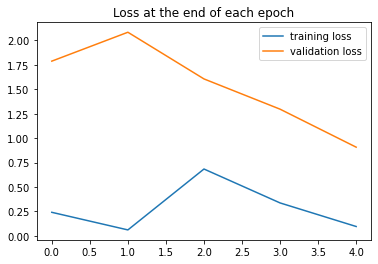

In [14]:
# Plot training & validation loss
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

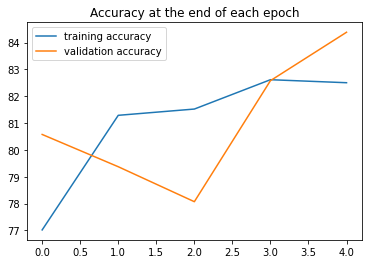

In [15]:
# Plot Accuracy at the end of each epoch
plt.plot([t/(len(train_data)/100) for t in train_correct], label='training accuracy')
plt.plot([t/(len(test_data)/100) for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

#### Confusion matrix to test the model

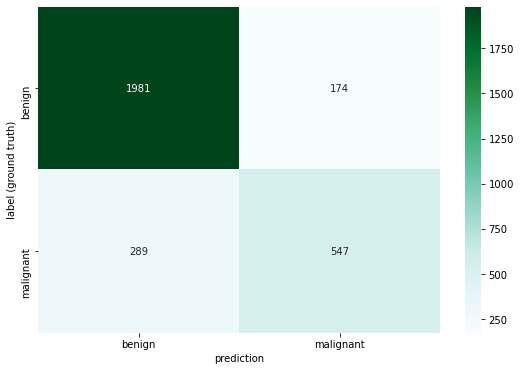

In [16]:
# Create a loader for the entire the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.round(y_val.data.view(1,-1))
        #predicted = torch.max(y_val,1)[1] #for multiclass
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
class_names = ['benign', 'malignant']
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

Here are some potential ways to improve performance:
Training the model for longer could have increased test accuracy.
During the data augmentation phase, normalization may impact potential feature detection, so modifying those values may result in performance changes.
The architecture that I used may have oversimplified the image by pooling it twice, reducing the detail of the features, making it harder to detect patterns between images.
For efficiency purposes, I probably didn’t need four fully-connected layers, and two or three would have likely resulted in similar values

#### CNN Results 

As we can see in the confusion matrix below we have many false negatives. When we are dealing with health data we want to make false negatives number as small as possible. We prefer our model to have more false positives rather than false negatives. 
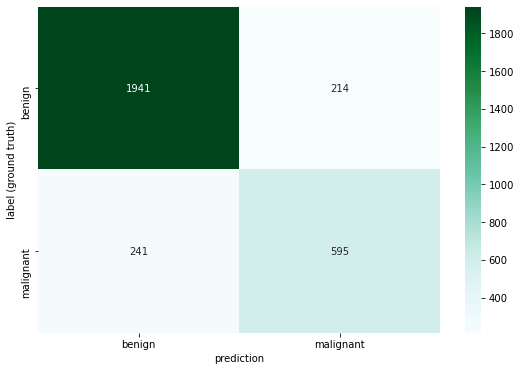

##### Saving Pytorch model

In [ ]:
# First way - Save and load the enitre model

In [22]:
# Save the model
torch.save(model, 'model.pt')

In [23]:
loaded_model = torch.load('model.pt')
loaded_model.eval()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [45]:
# Second way - Save and load only the model parameters (Recommended)

In [29]:
torch.save(model.state_dict(), 'model.pt')

In [5]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load('model.pt'))
loaded_model.eval()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

#### Single slide image prediction

In [6]:
#Single prediction
imsize = 50
loader = transforms.Compose([transforms.Resize((imsize,imsize)), transforms.ToTensor()])#transforms.Scale(imsize)

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    #image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image

image = image_loader('datasets/single_prediction/8863_idx5_x1051_y1651_class1.png')

In [7]:
image

tensor([[[[0.6078, 0.6314, 0.4510,  ..., 0.3686, 0.4824, 0.5333],
          [0.5255, 0.5373, 0.3882,  ..., 0.3412, 0.5686, 0.4941],
          [0.5333, 0.5373, 0.5176,  ..., 0.5294, 0.5843, 0.4235],
          ...,
          [0.5922, 0.6706, 0.6510,  ..., 0.7882, 0.9020, 0.8353],
          [0.5961, 0.5451, 0.6000,  ..., 0.6157, 0.4824, 0.4627],
          [0.5882, 0.5843, 0.5569,  ..., 0.7255, 0.6157, 0.4824]],

         [[0.3373, 0.4078, 0.2784,  ..., 0.2549, 0.3647, 0.3922],
          [0.3255, 0.3490, 0.2588,  ..., 0.2118, 0.3961, 0.3412],
          [0.3882, 0.3569, 0.3451,  ..., 0.3843, 0.3922, 0.2314],
          ...,
          [0.4118, 0.4706, 0.4588,  ..., 0.7216, 0.8784, 0.7725],
          [0.4588, 0.4118, 0.3686,  ..., 0.4549, 0.2941, 0.2941],
          [0.4039, 0.3804, 0.2902,  ..., 0.6235, 0.5451, 0.3882]],

         [[0.5451, 0.6000, 0.4980,  ..., 0.4745, 0.5725, 0.5843],
          [0.5255, 0.5490, 0.4745,  ..., 0.3922, 0.5961, 0.5451],
          [0.5765, 0.5569, 0.5412,  ..., 0

In [16]:
#Result
print(f"The carcinoma's type is: { 'Benign' if round(loaded_model(image).item()) == 0 else 'Malignant'}, p = ({round(loaded_model(image).item(),2)})")

The carcinoma's type is: Malignant, p = (0.76)
